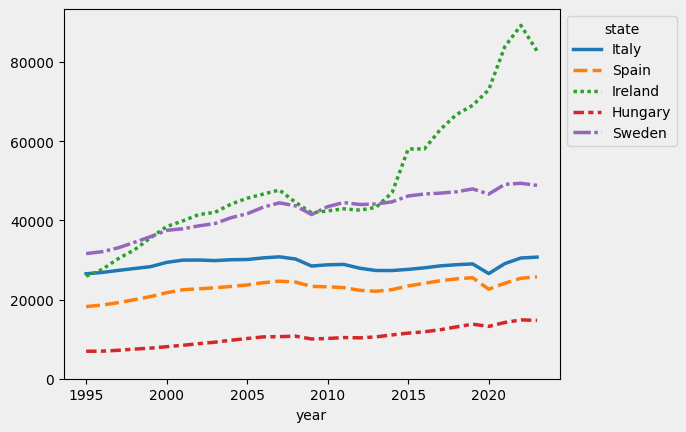

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

States = ['Italy', 'Spain', 'Ireland', 'Hungary', 'Sweden']
gdp_file = r'..\data\gdp_perCapita.csv'
df = pd.read_csv(gdp_file, sep=',', usecols=['geo', 'TIME_PERIOD', 'OBS_VALUE']).rename(columns={"geo":"state", "TIME_PERIOD": "year", "OBS_VALUE":"GDP" })
dfPivoted = df.pivot(index='year', columns='state', values='GDP')
lnPlot = sns.lineplot(data = dfPivoted[States], palette="tab10", linewidth= 2.5)
lnPlot.set_ylim(ymin=0)
sns.move_legend(obj=lnPlot, loc='upper right', bbox_to_anchor=(1.25, 1))

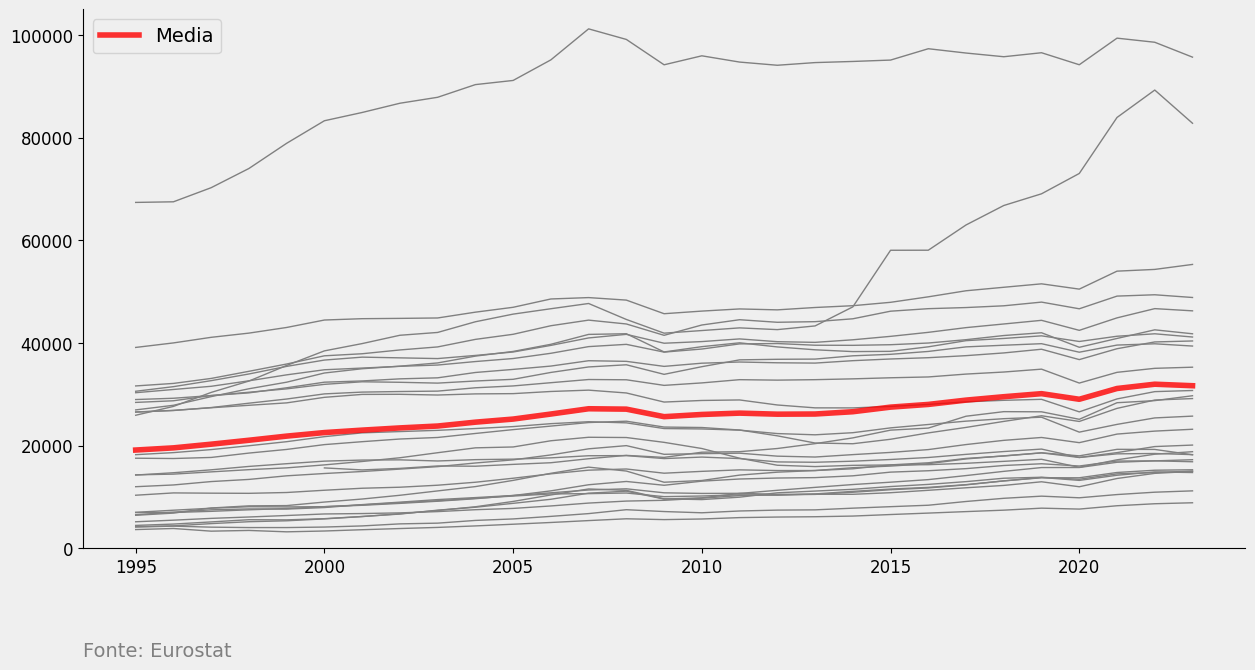

In [148]:
dfPctChange = dfPivoted.pct_change() * 100

plt.figure(figsize=(15,7))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

mean = dfPivoted.mean(axis=1)

for state in dfPivoted.columns:
    sns.lineplot(x=dfPivoted.index, y=dfPivoted[state], color="gray" , linewidth=1, label=None)
lnPlot = sns.lineplot(data=mean, color="red", linewidth=4, label="Media", alpha=0.8)
sns.set_style(rc={'axes.facecolor':'#efefef','figure.facecolor': '#efefef'})
plt.legend(handles=[
    plt.Line2D([0], [0], color='gray', lw=2, label='Stati'),
    plt.Line2D([0], [0], color='red', lw=4, label='Media')],
    loc='upper right', bbox_to_anchor=(1.25, 1))
lnPlot.set_ylim(ymin=0, ymax = 105000)

plt.ylabel(None)
plt.xlabel(None)
plt.legend(fontsize=14)
sns.despine()
plt.text(
    0, -0.2,  # Posizione
    "Fonte: Eurostat",
    fontsize=14,
    color='gray',
    ha='left',  # Allineamento orizzontale
    transform=plt.gca().transAxes  # Posiziona il testo in coordinate relative al grafico
)
plt.savefig(r'..\..\mean_gdp.png', transparent=True, bbox_inches='tight')

SyntaxError: keyword argument repeated: linewidth (1709351476.py, line 26)

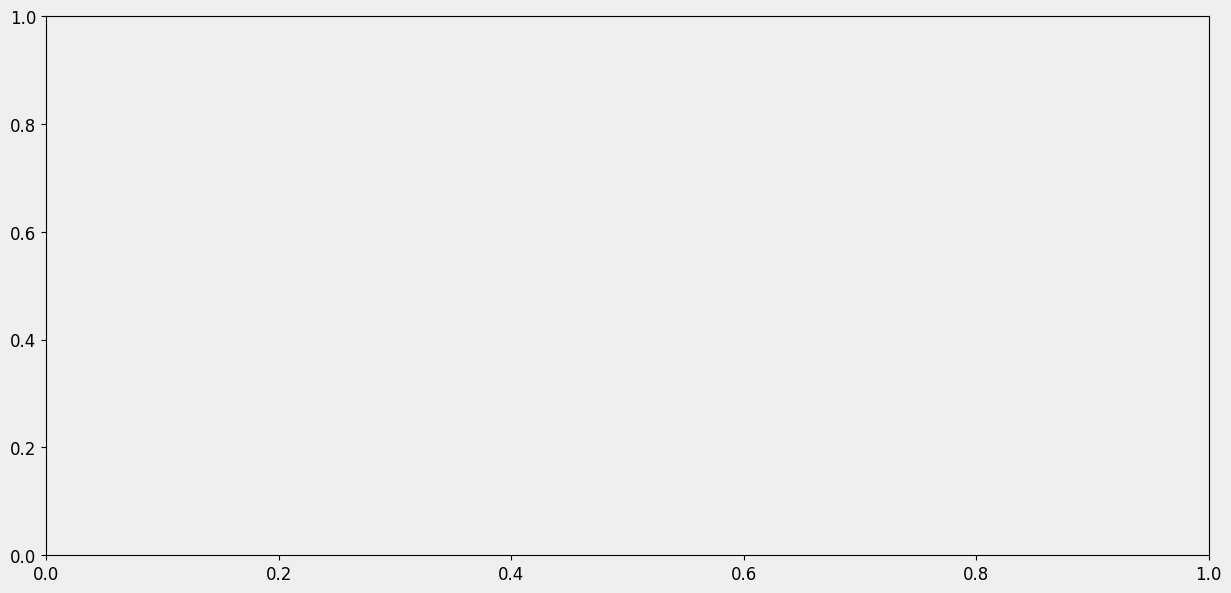

In [ ]:
import matplotlib.lines as mlines
var = dfPivoted.var(axis=1)
dev_std = dfPivoted.std(axis=1)
plt.figure(figsize=(15,7))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

five_states_cmap = {
    'Italy':'#549bc3',
    'Spain':'#deab51',
    'Ireland':'#6cbda7',
    'Hungary':'#d88d52',
    'Sweden':'#d5a7cc'
}

colors = {
    'Italy': '#549bc3',
    'Spain': '#deab51',
    'Ireland': '#6cbda7',
    'Hungary': '#d88d52',
    'Sweden': '#d5a7cc',
    'Deviazione std.': 'lightgray'
}

legend_elements = [
    mlines.Line2D([], [], linewidth=3, color=color, label=label)
    for label, color in colors.items()
]

for state in States:
    sns.lineplot(x=dfPivoted.index, y=dfPivoted[state], color=five_states_cmap[state], linewidth= 3)
lnPlot = sns.lineplot(data=mean, linewidth=5, color='red', hue_norm=(0, 100000), alpha=0.8)
lnPlot.set_ylim(ymin=0, ymax = 100000)
plt.fill_between(dfPivoted.index, mean - dev_std, 
                 mean + dev_std, alpha=0.5, label='Deviazione Standard', color="lightgray")
sns.set_style(rc={'axes.facecolor':'#efefef','figure.facecolor': '#efefef'})
plt.legend(handles=legend_elements, fontsize=12)
sns.despine()
lnPlot.set_xlabel(None)
lnPlot.set_ylabel(None)
plt.text(
    0, -0.2,  # Posizione
    "Fonte: Eurostat",
    fontsize=14,
    color='gray',
    ha='left',  # Allineamento orizzontale
    transform=plt.gca().transAxes  # Posiziona il testo in coordinate relative al grafico
)
plt.savefig(r'..\..\lnplot_GDP_devStd.png', transparent=True, bbox_inches='tight')

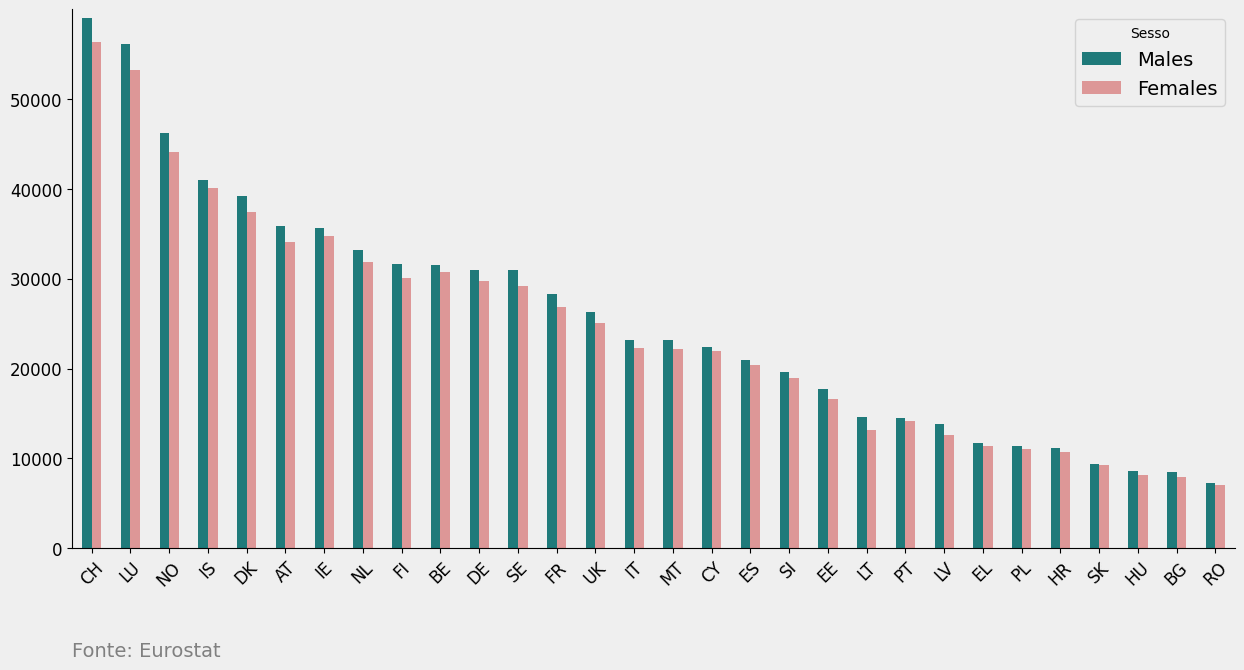

In [ ]:
# Unemployment rate in % of the active population between 15 and 74.
import matplotlib.ticker as ticker

df = pd.read_csv(r'..\data\mean_income_bySex.csv', sep=',', usecols=['geo','sex', 'TIME_PERIOD','OBS_VALUE'])

state_codes ={
    "Belgium": "BE",
    "Bulgaria": "BG",
    "Czech Republic": "CZ",
    "Denmark": "DK",
    "Germany": "DE",
    "Estonia": "EE",
    "Ireland": "IE",
    "Greece": "EL",
    "Spain": "ES",
    "France": "FR",
    "Croatia": "HR",
    "Italy": "IT",
    "Cyprus": "CY",
    "Latvia": "LV",
    "Lithuania": "LT",
    "Luxembourg": "LU",
    "Hungary": "HU",
    "Malta": "MT",
    "Netherlands": "NL",
    "Austria": "AT",
    "Poland": "PL",
    "Portugal": "PT",
    "Romania": "RO",
    "Slovenia": "SI",
    "Slovakia": "SK",
    "Finland": "FI",
    "Sweden": "SE",
    "United Kingdom": "UK",
    "Iceland": "IS",
    "Liechtenstein": "LI",
    "Norway": "NO",
    "Switzerland": "CH",
    "Turkey": "TR",
    "Israel": "IL"
}
df['geo'] = df['geo'].map(state_codes)

plt.figure(figsize=(15,7))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

df_males = df[df['sex'] == 'Males']
df_females = df[df['sex'] == 'Females']

df_males_latest_year = df_males.loc[df_males.groupby('geo')['TIME_PERIOD'].idxmax()]
df_females_latest_year = df_females.loc[df_females.groupby('geo')['TIME_PERIOD'].idxmax()]
df_latest_year = pd.concat([df_males_latest_year,df_females_latest_year])
result = df_latest_year.sort_values(['OBS_VALUE'], ascending=False).reset_index(drop=True)

ax = sns.barplot(
    data=result, x='geo', y='OBS_VALUE',hue='sex',
    width=0.5, errorbar=None, saturation=0.6,
    palette={'Females':'#f48080','Males':'#009999'}
    )


plt.legend(title='Sesso', fontsize=14)
ax.yaxis.set_major_locator(ticker.MultipleLocator(5000))
sns.despine()
plt.xticks(rotation=45)
ax.set_ylim(0,60000)
ax.set_yticks(np.arange(0,60000,step=10000))
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.text(
    0, -0.2,  # Posizione
    "Fonte: Eurostat",
    fontsize=14,
    color='gray',
    ha='left',  # Allineamento orizzontale
    transform=plt.gca().transAxes  # Posiziona il testo in coordinate relative al grafico
)
plt.savefig(r'..\..\mean_income_MvsF_barplot.png', transparent=True, bbox_inches='tight')


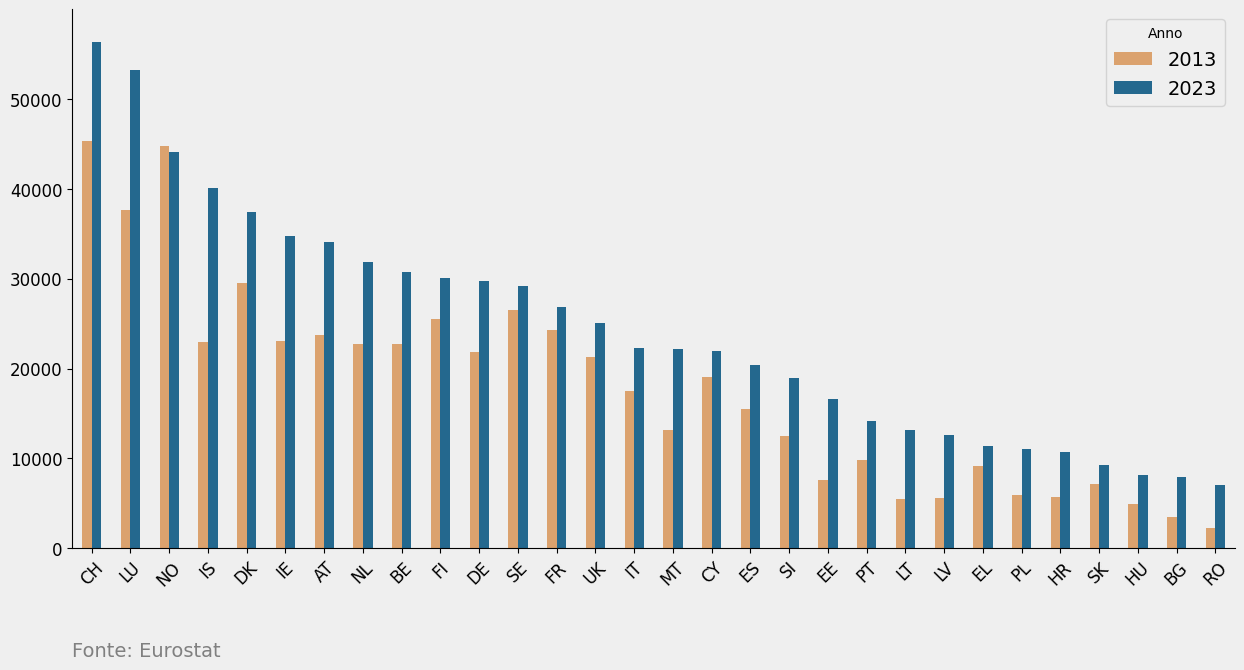

In [ ]:
df_total = df[df['sex'] != 'Total'] 

plt.figure(figsize=(15,7))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

closest_to_2010 = df_total.loc[
    df_total.groupby('geo')['TIME_PERIOD'].apply(lambda x: (x - 2013).abs().idxmin())
]
latest_year = df_total.loc[df_total.groupby('geo')['TIME_PERIOD'].idxmax()]
result = pd.concat([closest_to_2010, latest_year]).drop_duplicates().reset_index(drop=True)
result.loc[result['TIME_PERIOD'] != result.groupby('geo')['TIME_PERIOD'].transform('max'), 'TIME_PERIOD'] = 2013
result.loc[result['TIME_PERIOD'] == result.groupby('geo')['TIME_PERIOD'].transform('max'), 'TIME_PERIOD'] = 2023
result = result.sort_values(['OBS_VALUE'], ascending=False).reset_index(drop=True)

ax = sns.barplot(
    data=result, x='geo', y='OBS_VALUE',hue='TIME_PERIOD',
    width=0.5, errorbar=None, saturation=0.6,
    palette={2013:'#FFA14A',2023:'#0072B2'}
    )


plt.legend(title='Anno', fontsize=14)
ax.yaxis.set_major_locator(ticker.MultipleLocator(5000))
sns.despine()
plt.xticks(rotation=45)
ax.set_ylim(0,60000)
ax.set_yticks(np.arange(0,60000,step=10000))
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.text(
    0, -0.2,  # Posizione
    "Fonte: Eurostat",
    fontsize=14,
    color='gray',
    ha='left',  # Allineamento orizzontale
    transform=plt.gca().transAxes  # Posiziona il testo in coordinate relative al grafico
)
plt.savefig(r'..\..\mean_income_years_barplot.png', transparent=True, bbox_inches='tight')

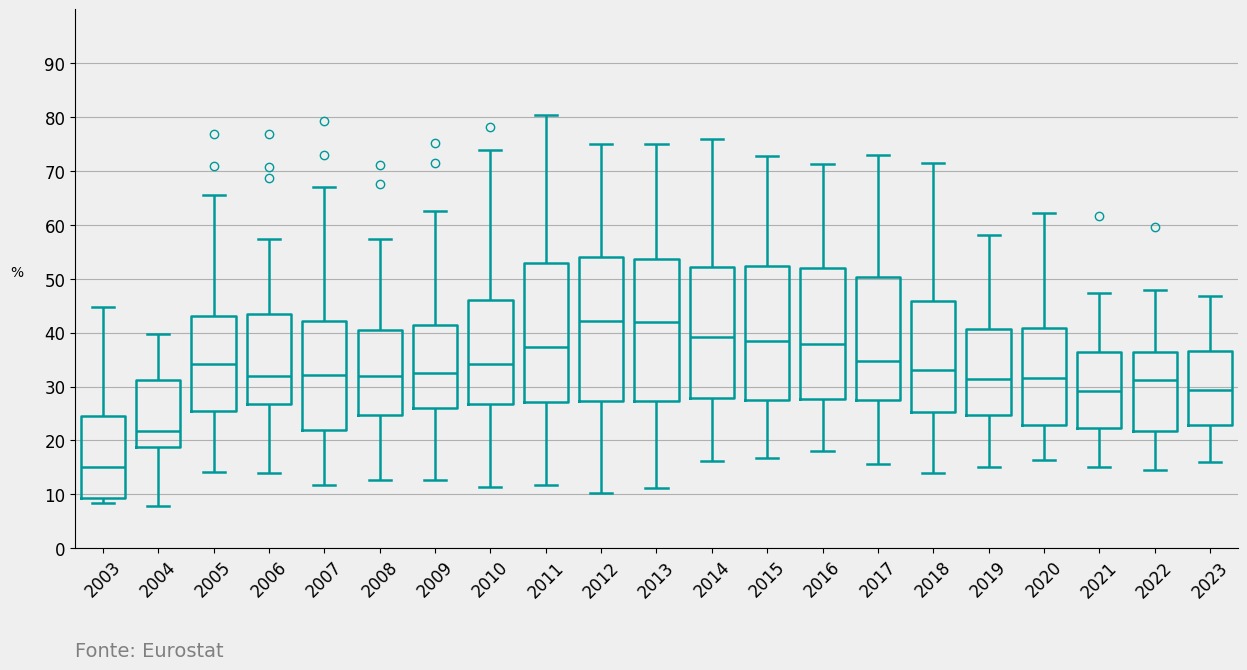

In [ ]:
df = pd.read_csv(r'..\data\unexpected_expenses.csv', usecols=['geo', 'TIME_PERIOD', 'OBS_VALUE'])

mean = df.groupby('TIME_PERIOD')['OBS_VALUE'].mean()
mean = pd.DataFrame(mean)

plt.figure(figsize=(15,7))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

ax = sns.boxplot(x=df['TIME_PERIOD'], y=df['OBS_VALUE'], fill=False, color='#009999', linewidth=1.8, saturation=0.5)
sns.despine()
ax.set_xlabel(None)
ax.set_ylabel('%', rotation=0, labelpad=20)
ax.set_ylim(0,100)
plt.xticks(rotation=45)
ax.set_yticks(np.arange(0,100,step=10))
plt.grid(axis='y')
plt.text(
    0, -0.2,  # Posizione
    "Fonte: Eurostat",
    fontsize=14,
    color='gray',
    ha='left',  # Allineamento orizzontale
    transform=plt.gca().transAxes  # Posiziona il testo in coordinate relative al grafico
)
plt.savefig(r'..\..\unexpected_expenses_boxplot.png', transparent=True, bbox_inches='tight')

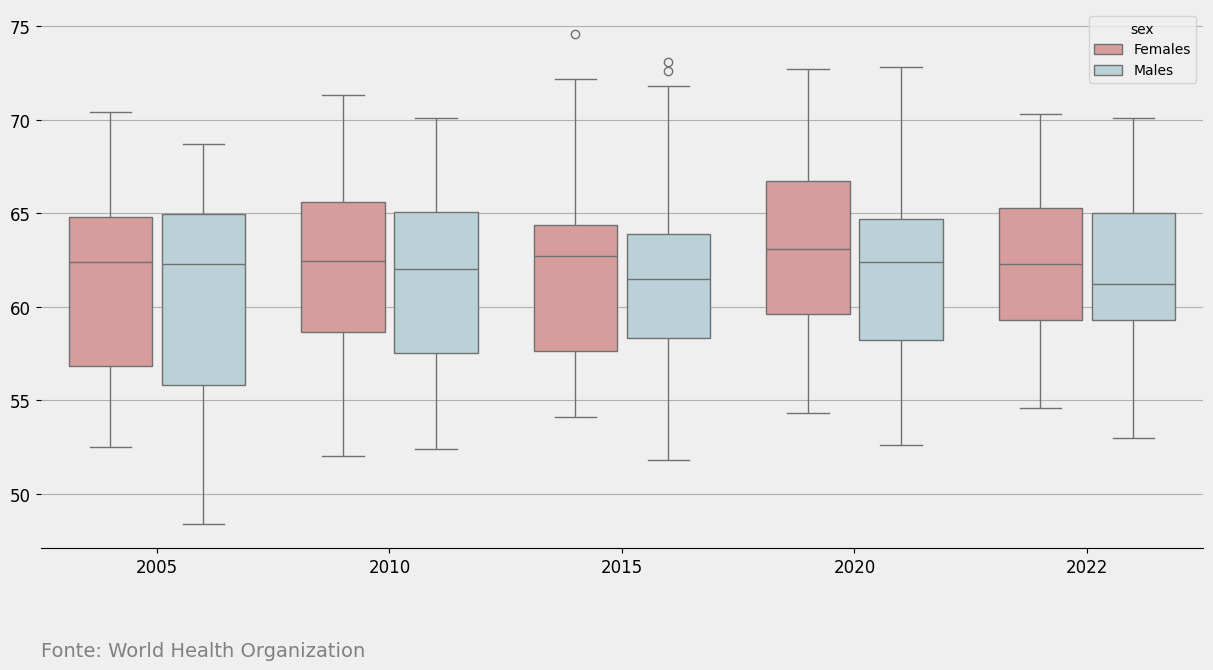

In [ ]:
df = pd.read_csv(r'..\data\healthy_life_years.csv', usecols=['geo', 'TIME_PERIOD', 'sex', 'OBS_VALUE'])
df_sex = df[df['sex'] != 'Total']
df_filtered = df_sex[df_sex['TIME_PERIOD'].isin([2005,2010,2015,2020,2022])]
plt.figure(figsize=(15,7))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax = sns.boxplot(
    data=df_filtered, x="TIME_PERIOD", y="OBS_VALUE",
    hue="sex", gap=.1, fill=True,
    legend=True, palette={'Females':'#f48080','Males':'lightblue'},
    linewidth=1, saturation=0.5
    )

plt.grid(axis='y')
ax.set_xlabel(None)
ax.set_ylabel(None)
sns.despine(left=True)
plt.text(
    0, -0.2,  # Posizione
    "Fonte: World Health Organization",
    fontsize=14,
    color='gray',
    ha='left',  # Allineamento orizzontale
    transform=plt.gca().transAxes  # Posiziona il testo in coordinate relative al grafico
)
plt.savefig(r'..\..\healthy_life_years.png', transparent=True, bbox_inches='tight')

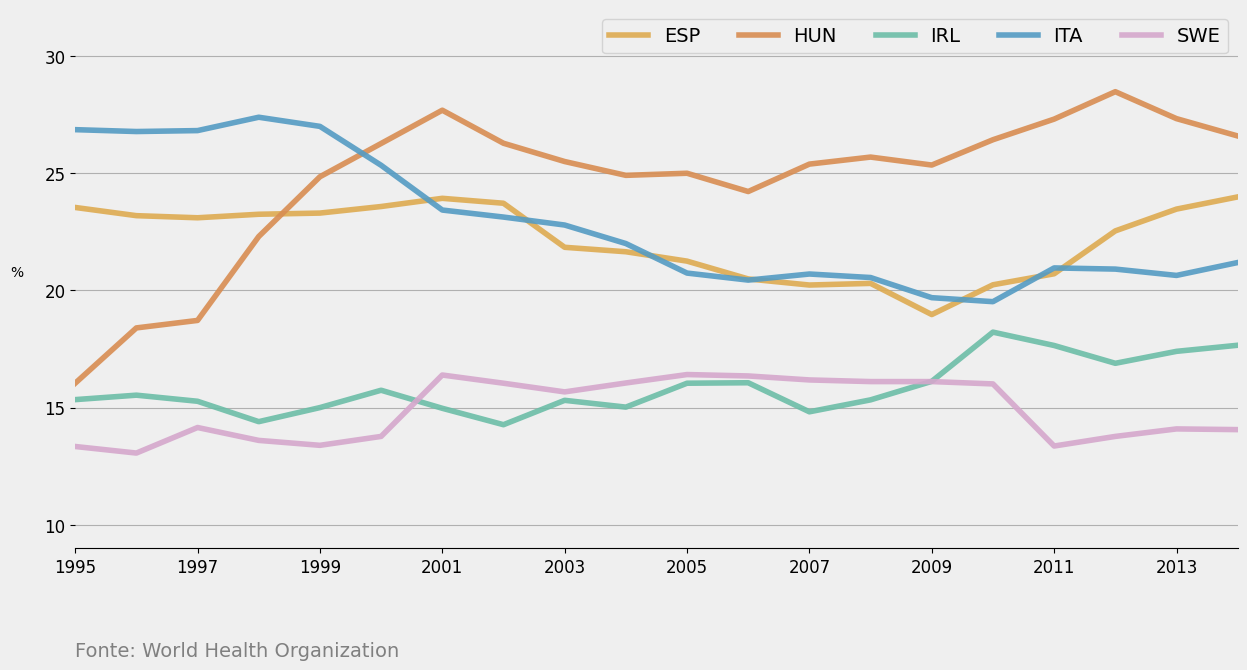

In [ ]:
df = pd.read_csv(r'..\data\private_payments_health.csv', usecols=['COUNTRY','COUNTRY_GRP', 'YEAR', 'VALUE'])

df_states = df.dropna(subset='COUNTRY').drop(columns='COUNTRY_GRP')
df_states = df_states[df_states['COUNTRY'].isin(['ITA','ESP','IRL','SWE','HUN'])]

df_groups = df.dropna(subset='COUNTRY_GRP').drop(columns='COUNTRY')

plt.figure(figsize=(15,7))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

five_states_cmap = {
    'ITA':'#549bc3',
    'ESP':'#deab51',
    'IRL':'#6cbda7',
    'HUN':'#d88d52',
    'SWE':'#d5a7cc'
}

ax = sns.lineplot(
    data=df_states, x='YEAR', y='VALUE', hue='COUNTRY',
    palette=five_states_cmap, alpha=0.9, linewidth= 4
             )

ax.set_xlabel(None)
ax.set_ylabel(None)

ax.set_xlim(1995,2014)
ax.set_ylim(9,32)
ax.set_ylabel('%', rotation=0, labelpad=20)
ax.set_xticks(np.arange(1995,2015,step=2))

plt.legend(title='', fontsize=14,
           loc="upper right", ncol=len(df_states['COUNTRY'].unique()))
sns.despine(left=True)
plt.grid(axis='y')
plt.text(
    0, -0.2,  # Posizione
    "Fonte: World Health Organization",
    fontsize=14,
    color='gray',
    ha='left',  # Allineamento orizzontale
    transform=plt.gca().transAxes  # Posiziona il testo in coordinate relative al grafico
)
plt.savefig(r'..\..\private_payments_health.png', transparent=True, bbox_inches='tight')

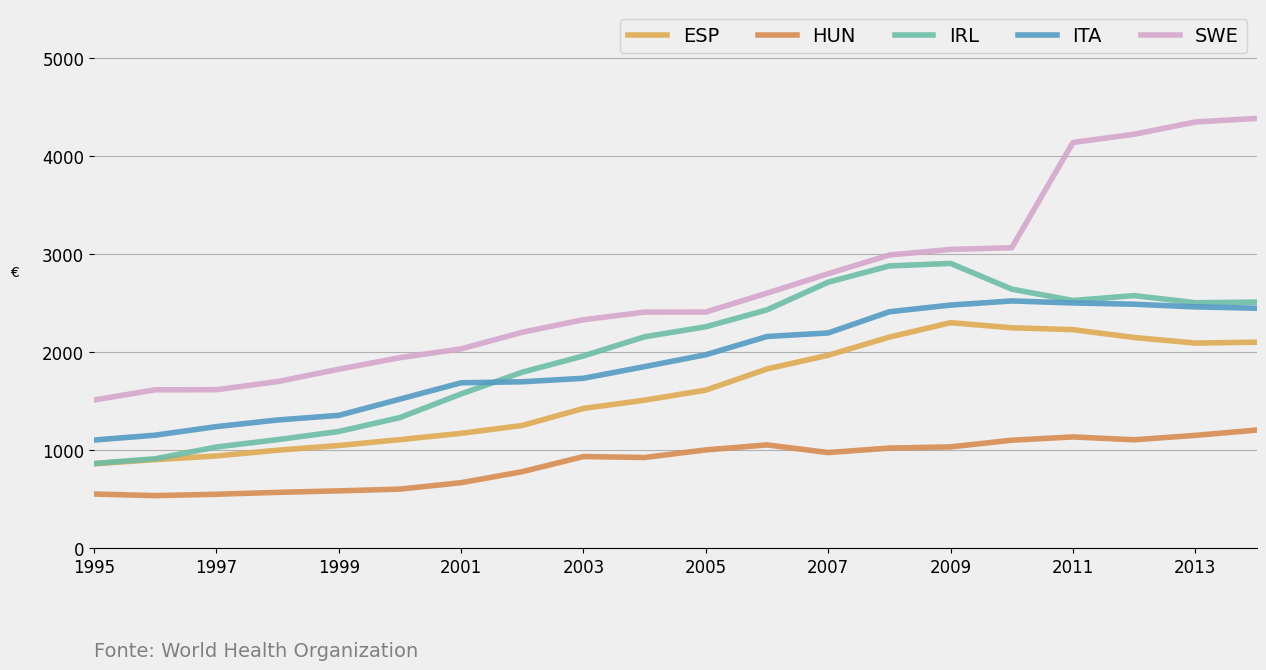

In [ ]:
df = pd.read_csv(r'..\data\health_public_expenditure_pp.csv', usecols=['COUNTRY','COUNTRY_GRP', 'YEAR', 'VALUE'])

df_states = df.dropna(subset='COUNTRY').drop(columns='COUNTRY_GRP')
df_states = df_states[df_states['COUNTRY'].isin(['ITA','ESP','IRL','SWE','HUN'])]

df_groups = df.dropna(subset='COUNTRY_GRP').drop(columns='COUNTRY')

plt.figure(figsize=(15,7))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

five_states_cmap = {
    'ITA':'#549bc3',
    'ESP':'#deab51',
    'IRL':'#6cbda7',
    'HUN':'#d88d52',
    'SWE':'#d5a7cc'
}

ax = sns.lineplot(
    data=df_states, x='YEAR', y='VALUE', hue='COUNTRY',
    palette=five_states_cmap, alpha=0.9, linewidth= 4
             )

ax.set_xlabel(None)
ax.set_ylabel(None)

ax.set_xlim(1995,2014)
ax.set_ylim(0,5500)
ax.set_ylabel('€', rotation=0, labelpad=20)
ax.set_xticks(np.arange(1995,2015,step=2))

plt.legend(title='', fontsize=14,
           loc="upper right", ncol=len(df_states['COUNTRY'].unique()))
sns.despine(left=True)
plt.grid(axis='y')
plt.text(
    0, -0.2,  # Posizione
    "Fonte: World Health Organization",
    fontsize=14,
    color='gray',
    ha='left',  # Allineamento orizzontale
    transform=plt.gca().transAxes  # Posiziona il testo in coordinate relative al grafico
)
plt.savefig(r'..\..\health_public_expenditure_pp.png', transparent=True, bbox_inches='tight')

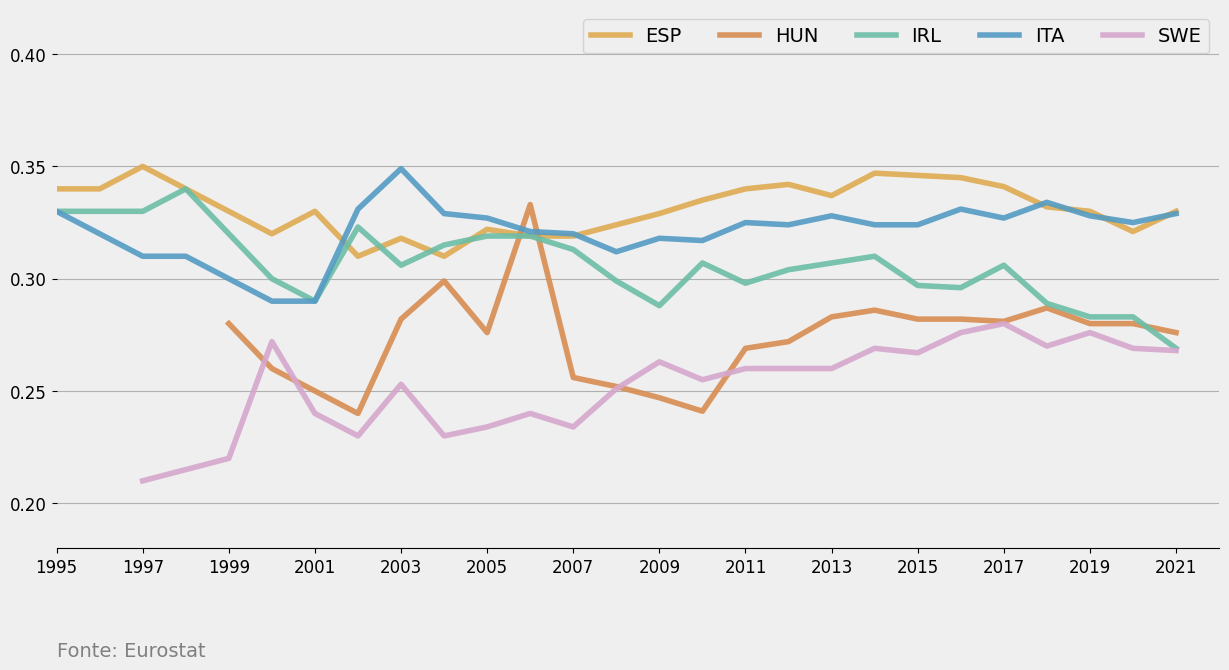

In [ ]:
df = pd.read_csv(r'..\data\income_inequality.csv', usecols=['COUNTRY','COUNTRY_GRP', 'YEAR', 'VALUE'])
df['VALUE'] = df['VALUE'] /100

df_states = df.dropna(subset='COUNTRY').drop(columns='COUNTRY_GRP')
df_states = df_states[df_states['COUNTRY'].isin(['ITA','ESP','IRL','SWE','HUN'])]

df_groups = df.dropna(subset='COUNTRY_GRP').drop(columns='COUNTRY').rename({'YEAR': 'YEAR', 'VALUE':'VALUE', 'COUNTRY_GRP':'COUNTRY'}, axis='columns')

#df_states = pd.concat([df_states, df_groups[df_groups['COUNTRY'] == 'EU_MEMBERS']])

plt.figure(figsize=(15,7))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

five_states_cmap = {
    'ITA':'#549bc3',
    'ESP':'#deab51',
    'IRL':'#6cbda7',
    'HUN':'#d88d52',
    'SWE':'#d5a7cc'
}

ax = sns.lineplot(
    data=df_states, x='YEAR', y='VALUE', hue='COUNTRY',
    palette=five_states_cmap, alpha=0.9, linewidth= 4
             )

ax.set_xlabel(None)
ax.set_ylabel(None)

ax.set_xlim(1995,2022)
ax.set_ylim(0.18, 0.42)
ax.set_xticks(np.arange(1995,2022,step=2))

plt.legend(title='', fontsize=14, loc="upper right", ncol=len(df_states['COUNTRY'].unique()))
sns.despine(left=True)
plt.grid(axis='y')
plt.text(
    0, -0.2,  # Posizione
    "Fonte: Eurostat",
    fontsize=14,
    color='gray',
    ha='left',  # Allineamento orizzontale
    transform=plt.gca().transAxes  # Posiziona il testo in coordinate relative al grafico
)
plt.savefig(r'..\..\gini_index_income.png', transparent=True, bbox_inches='tight')

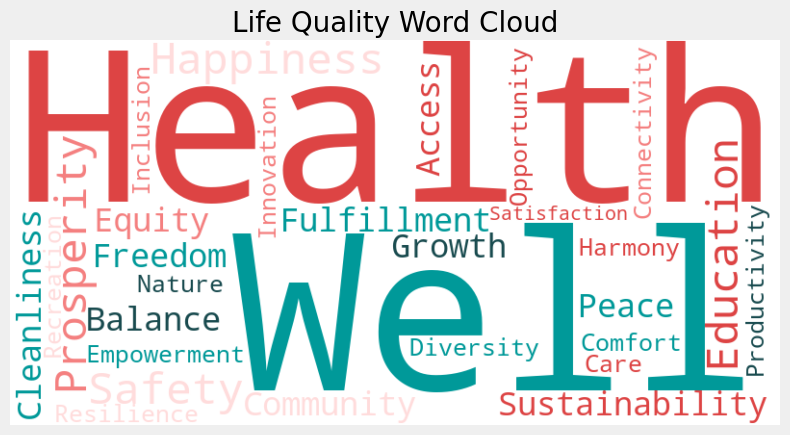

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

# Define a list of life quality words/terms
life_quality_terms = [
    "Well-being", "Health", "Happiness", "Prosperity", "Safety", "Education",
    "Sustainability", "Equity", "Community", "Fulfillment", "Balance", "Access",
    "Peace", "Freedom", "Cleanliness", "Growth", "Empowerment", "Diversity",
    "Harmony", "Care", "Resilience", "Connectivity", "Productivity", "Opportunity",
    "Comfort", "Innovation", "Recreation", "Nature", "Inclusion", "Satisfaction"
]

# Convert the list into a single string with space-separated words
text = " ".join(life_quality_terms)

# Define custom colors
custom_colors = ['#dd4444', '#f48080', '#ffdcdc', '#009999', '#194b4f']

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    contour_width=3,
    contour_color='steelblue',
    color_func=lambda *args, **kwargs: custom_colors[hash(args[0]) % len(custom_colors)],
    prefer_horizontal=0.9  # Increase density by preferring horizontal words
).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title("Life Quality Word Cloud", fontsize=20)
plt.show()
